<a href="https://colab.research.google.com/github/miguelmendesSerrano/Python_Developer_DIO/blob/main/Analise_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Carregar o dataset de histórico de preços do Bitcoin

df = pd.read_csv('BTC_USD.csv')

In [3]:
# Exibir algumas linhas do dataset para verificar se foi carregado corretamente.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700
1,2015-03-01,254.283005,300.044006,236.514999,244.223999,244.223999,959098300
2,2015-04-01,244.223007,261.798004,214.873993,236.145004,236.145004,672338700
3,2015-05-01,235.938995,247.804001,228.572998,230.190002,230.190002,568122600
4,2015-06-01,230.233002,267.867004,221.296005,263.071991,263.071991,629780200


In [4]:
# Verificar informações gerais do dataset.
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
df.shape

(104, 7)

In [6]:
# Verificar se existem valores nulos.
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Converter coluna "Date" de object para datetime.
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

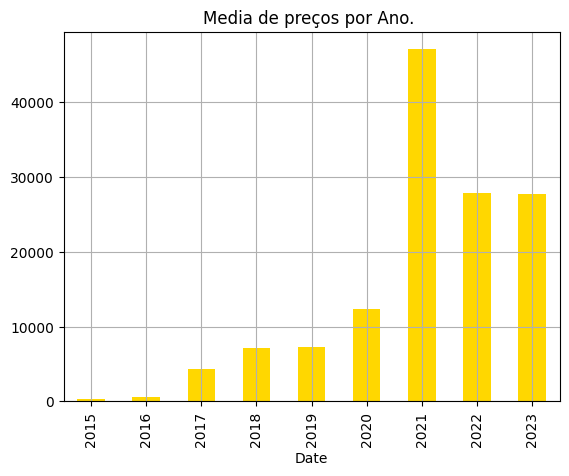

In [36]:
# Preço médio de BTC por Ano.

(df.groupby(df['Date'].dt.year)['Close'].mean()).plot.bar(grid=True, color='gold', title='Media de preços por Ano. ');

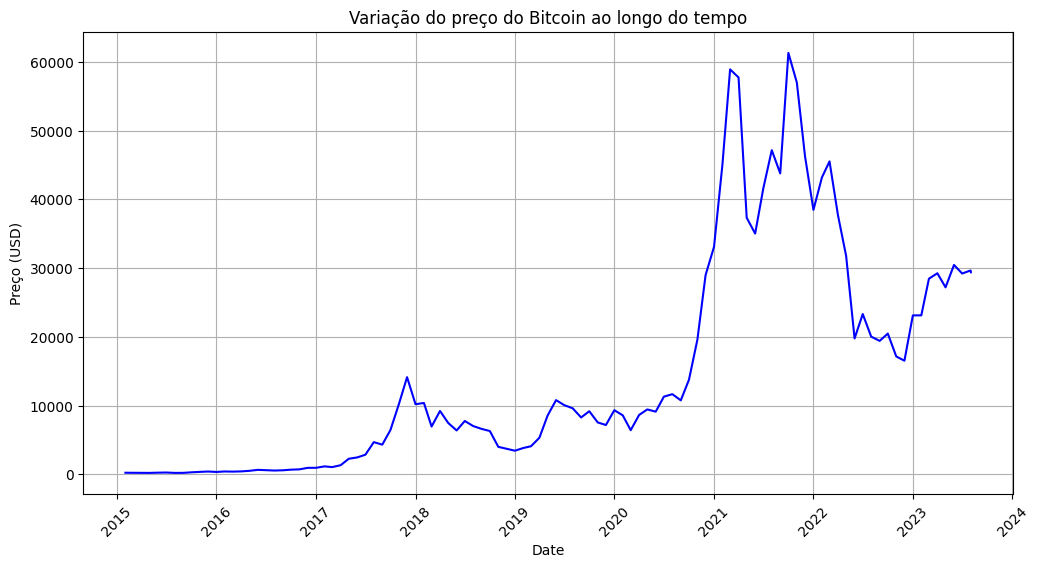

In [10]:
# Gráfico de linhas para visualizar a variação do preço ao longo do tempo.

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='b')
plt.xlabel('Date')
plt.ylabel('Preço (USD)')
plt.title('Variação do preço do Bitcoin ao longo do tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

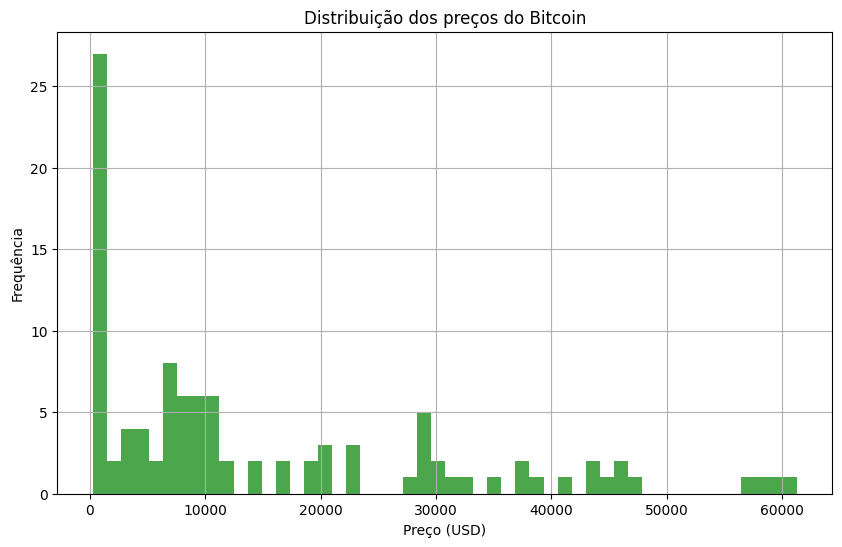

In [11]:
# Histograma para visualizar a distribuição dos preços.

plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=50, color='g', alpha=0.7)
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.title('Distribuição dos preços do Bitcoin')
plt.grid(True)
plt.show()

In [37]:
# Calcular a média móvel de 3 meses para a tendência de curto prazo.

df['Media_Movel_Curto'] = df['Close'].rolling(window=3).mean()

In [38]:
# Calcular a média móvel de 12 meses para a tendência de longo prazo.

df['Media_Movel_Longo'] = df['Close'].rolling(window=12).mean()

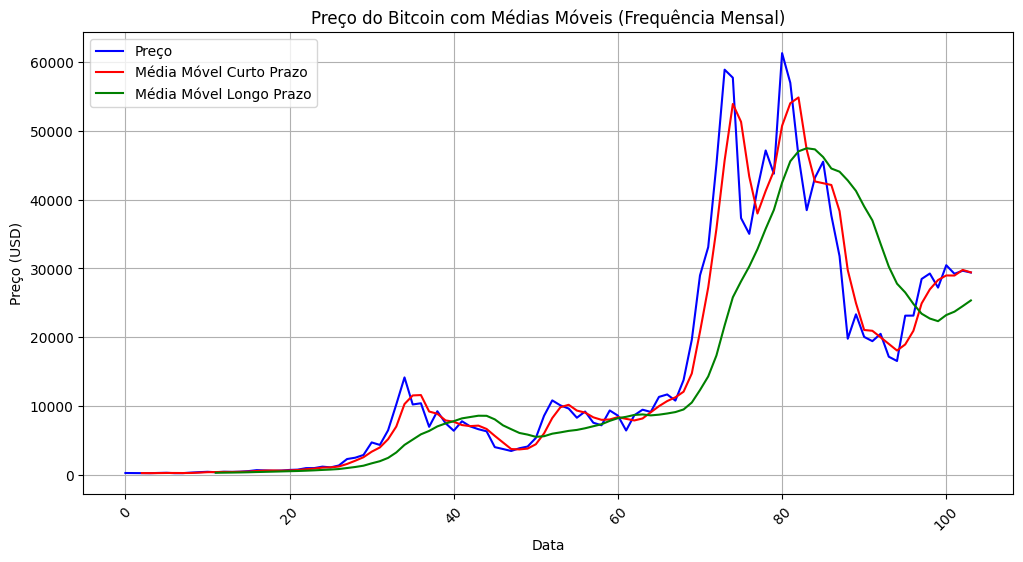

In [39]:
# Gráfico com as médias móveis e o preço do Bitcoin ao longo do tempo.

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Preço', color='b')
plt.plot(df.index, df['Media_Movel_Curto'], label='Média Móvel Curto Prazo', color='r')
plt.plot(df.index, df['Media_Movel_Longo'], label='Média Móvel Longo Prazo', color='g')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Preço do Bitcoin com Médias Móveis (Frequência Mensal)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()